In [33]:
import json
import numpy as np
import math
import json
import matplotlib.pyplot as plt
from scipy import interpolate 
import pylab as pl 
import matplotlib as mpl 

In [34]:
#StructureFactorX.real
#stuXr
L = 7
iter = 1000
stuXr_1 = []
g = 0.01
NN = L*L

for kx in np.arange(0, 101, 5):
    for ky in np.arange(0, 101, 5):
        #print("%d %d"%(kx, ky))
        stuXr_each_kx_ky = []
        data = json.load(open("log_data_%d*%d_structure_factor_x_g_%0.2f/<text%0.2f_iter_%d_%d*%d_kx_%d_ky_%d>.log"%(L, L, g, g, iter, L, L, kx, ky),))
        for iteration in data["StructureFactorX"]["Mean"]["real"]:
            stuXr_each_kx_ky.append(iteration)
        stuXr_each_kx_ky_mean = abs(np.mean(stuXr_each_kx_ky[-20:]))
        stuXr_1.append(stuXr_each_kx_ky_mean/(NN*(NN-1)))
                               

In [35]:
stuXr_2 = []
g2 = 1

for kx in np.arange(0, 101, 5):
    for ky in np.arange(0, 101, 5):
        #print("%d %d"%(kx, ky))
        stuXr_each_kx_ky = []
        data = json.load(open("log_data_%d*%d_structure_factor_x_g_%0.2f/<text%0.2f_iter_%d_%d*%d_kx_%d_ky_%d>.log"%(L, L, g2, g2, iter, L, L, kx, ky),))
        for iteration in data["StructureFactorX"]["Mean"]["real"]:
            stuXr_each_kx_ky.append(iteration)
        stuXr_each_kx_ky_mean = abs(np.mean(stuXr_each_kx_ky[-20:]))
        stuXr_2.append(stuXr_each_kx_ky_mean/(NN*(NN-1)))

In [36]:
G1 = np.reshape(stuXr_1, (-1, 21))
G2 = np.reshape(stuXr_2, (-1, 21))

In [37]:
y,x= np.mgrid[0:1:21j, 0:1:21j] 
#插值
newfunc = interpolate.interp2d(x, y, G2, kind='cubic') 
newfunc_1 = interpolate.interp2d(x, y, G1, kind='cubic') 

/usr/local/machine-learnig-QM/.netket_cpu/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=22,29 m=441 fp=58.766336 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [54]:
xnew = np.linspace(-1,1,200)#x 
ynew = np.linspace(-1,1,200)#y 
fnew = newfunc(xnew, ynew)#仅仅是y值 100*100的值
fnew_1 = newfunc_1(xnew, ynew)#仅仅是y值 100*100的值  

/tmp/ipykernel_10211/4119898622.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(im1, fraction=0.046, pad=0.04)


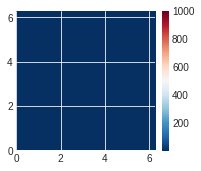

In [55]:
pl.subplot(121) 
im1=pl.imshow(G2, extent=[0,2*math.pi,0,2*math.pi], cmap='RdBu_r', interpolation='nearest', origin="lower", vmax=1000)#pl.cm.jet 
#extent=[-1,1,-1,1]为x,y范围 favals为 
pl.colorbar(im1, fraction=0.046, pad=0.04) 
#plt.savefig("pic_structure_factor_x_2_d/g_1.00_%d_%d_insert.png"%(L, L), dpi=1200,bbox_inches='tight')

/tmp/ipykernel_10211/3076591766.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(im2, fraction=0.046, pad=0.04)


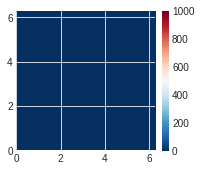

In [56]:
pl.subplot(122) 
#改变interpolation可使用不同插值
#supported interpolation values are 'antialiased', 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos', 'blackman'
#效果比较好的有 quadric hamming gaussian
im2=pl.imshow(G1, extent=[0,2*math.pi,0,2*math.pi], cmap='RdBu_r', interpolation='gaussian', origin="lower", vmax=1000, vmin=0) 
pl.colorbar(im2, fraction=0.046, pad=0.04) 
 
#plt.savefig("pic_structure_factor_x_2_d/g_1.00_%d_%d_insert.png"%(L, L), dpi=1200,bbox_inches='tight')

/tmp/ipykernel_10211/3382555204.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(im1, fraction=0.046, pad=0.04)
/tmp/ipykernel_10211/3382555204.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(im2, fraction=0.046, pad=0.04)


Text(0.5, 1.0, 'g = 1.00')

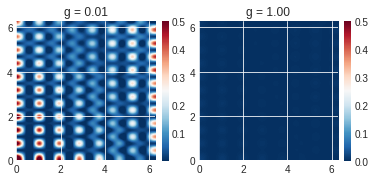

In [66]:
pl.subplot(121) 
im1=pl.imshow(G1, extent=[0,2*math.pi,0,2*math.pi], cmap='RdBu_r', interpolation='blackman', origin="lower", vmax=0.5)#pl.cm.jet 
#extent=[-1,1,-1,1]为x,y范围 favals为 
pl.colorbar(im1, fraction=0.046, pad=0.04) 
pl.title("g = 0.01")

pl.style.use('seaborn-darkgrid') # 设置画图的风格 
pl.subplot(122) 
im2=pl.imshow(G2, extent=[0,2*math.pi,0,2*math.pi], cmap='RdBu_r', interpolation='quadric', origin="lower", vmax=0.5, vmin=0) 
pl.colorbar(im2, fraction=0.046, pad=0.04) 
pl.title("g = 1.00")
#plt.savefig("pic_structure_factor_x_2_d/g_1.00_1.00_%d_%d_insert.png"%(L, L), dpi=1200,bbox_inches='tight')

/tmp/ipykernel_10211/844330569.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pcm = ax.pcolormesh(G1,
/tmp/ipykernel_10211/844330569.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(pcm, ax=ax)


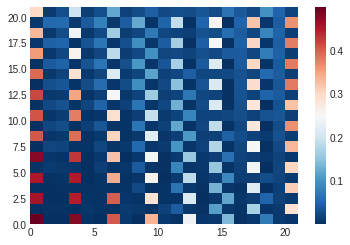

In [42]:
# Fixing random state for reproducibility
np.random.seed(1968011)

fig, axs = plt.subplots(1, 1)
#cmaps = 'viridis'
cmaps = 'RdBu_r'
for col in range(1):
    for row in range(1):
        ax = axs
        pcm = ax.pcolormesh(G1,
                            cmap=cmaps)
        fig.colorbar(pcm, ax=ax)
plt.show()